In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas_datareader as web

c:\python38\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


Using Pandas DataReader , I am trying to Fetch Apple's Stock Price Details as a Dataframe From Yahoo .com

In [3]:
df=web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2020-06-01')

In [4]:
df

High         Low        Open       Close      Volume  \
Date                                                                     
2012-01-03   58.928570   58.428570   58.485714   58.747143  75555200.0   
2012-01-04   59.240002   58.468571   58.571430   59.062859  65005500.0   
2012-01-05   59.792858   58.952858   59.278572   59.718571  67817400.0   
2012-01-06   60.392857   59.888573   59.967144   60.342857  79573200.0   
2012-01-09   61.107143   60.192856   60.785713   60.247143  98506100.0   
...                ...         ...         ...         ...         ...   
2020-05-26  324.239990  316.500000  323.500000  316.730011  31380500.0   
2020-05-27  318.709991  313.089996  316.140015  318.109985  28236300.0   
2020-05-28  323.440002  315.630005  316.769989  318.250000  33390200.0   
2020-05-29  321.149994  316.470001  319.250000  317.940002  38399500.0   
2020-06-01  322.350006  317.209991  317.750000  321.850006  20197800.0   

             Adj Close  
Date                    
2012-01-03   50.857235  
2012-01-04   51.130558  
2012-01-05   51.698215  
2012-01-06   52.238651  
2012-01-09   52.155792  
...                ...  
2020-05-26  316.730011  
2020-05-27  318.109985  
2020-05-28  318.250000  
2020-05-29  317.940002  
2020-06-01  321.850006  

[2116 rows x 6 columns]

In [5]:
df.shape

(2116, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2116 entries, 2012-01-03 to 2020-06-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2116 non-null   float64
 1   Low        2116 non-null   float64
 2   Open       2116 non-null   float64
 3   Close      2116 non-null   float64
 4   Volume     2116 non-null   float64
 5   Adj Close  2116 non-null   float64
dtypes: float64(6)
memory usage: 115.7 KB


As You Can SEE , Date has already been set As Index By using Pandas datareader function

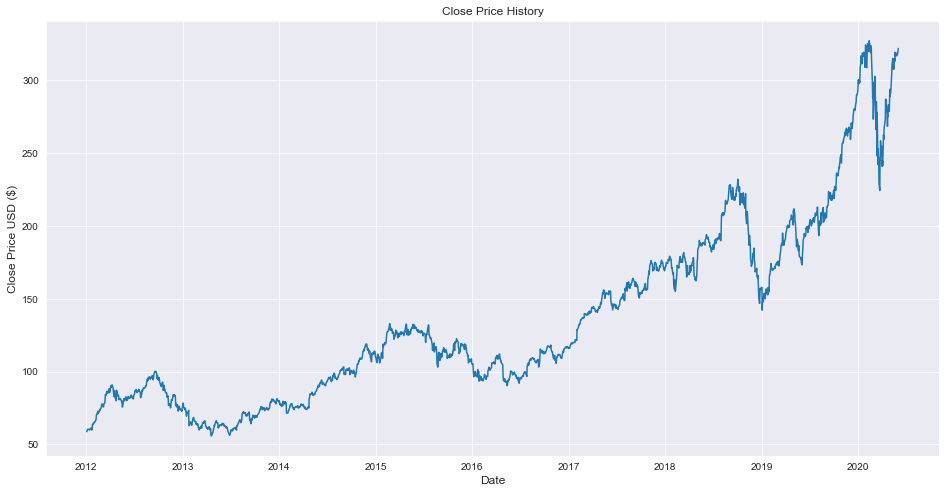

In [7]:
sns.set_style('darkgrid')
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=12)
plt.ylabel('Close Price USD ($)',fontsize=12)
plt.show()

In [8]:
data_df=df.filter(['Close'])

In [9]:
data_df

Close
Date                  
2012-01-03   58.747143
2012-01-04   59.062859
2012-01-05   59.718571
2012-01-06   60.342857
2012-01-09   60.247143
...                ...
2020-05-26  316.730011
2020-05-27  318.109985
2020-05-28  318.250000
2020-05-29  317.940002
2020-06-01  321.850006

[2116 rows x 1 columns]

In [10]:
data_df=data_df.values          #Converting Into Array For Model Training Purposes

In [11]:
data_df

array([[ 58.74714279],
       [ 59.06285858],
       [ 59.71857071],
       ...,
       [318.25      ],
       [317.94000244],
       [321.8500061 ]])

In [12]:
len(data_df)

2116

### I am Taking My Data as 80% For Training and 20% For Testing :

In [13]:
train_index=int(len(data_df)*0.8)

In [14]:
train_index

1692

In [15]:
train_data=data_df[:train_index]

In [16]:
train_data

array([[ 58.74714279],
       [ 59.06285858],
       [ 59.71857071],
       ...,
       [218.36999512],
       [220.02999878],
       [217.66000366]])

In [17]:
test_data=data_df[train_index:]

In [18]:
test_data

array([[220.78999329],
       [222.19000244],
       [220.41999817],
       [224.94999695],
       [225.74000549],
       [227.25999451],
       [229.27999878],
       [232.07000732],
       [227.99000549],
       [224.28999329],
       [223.77000427],
       [226.86999512],
       [216.36000061],
       [214.44999695],
       [222.11000061],
       [217.36000061],
       [222.1499939 ],
       [221.19000244],
       [216.02000427],
       [219.30999756],
       [220.6499939 ],
       [222.72999573],
       [215.08999634],
       [219.80000305],
       [216.30000305],
       [212.24000549],
       [213.30000305],
       [218.86000061],
       [222.22000122],
       [207.47999573],
       [201.58999634],
       [203.77000427],
       [209.94999695],
       [208.49000549],
       [204.47000122],
       [194.16999817],
       [192.22999573],
       [186.80000305],
       [191.41000366],
       [193.52999878],
       [185.86000061],
       [176.97999573],
       [176.77999878],
       [172

In [19]:
len(train_data)

1692

In [20]:
len(test_data)

424

## Scaling :

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler=MinMaxScaler(feature_range=(0,1))     #To scale only between 0 to 1

In [23]:
scaled_train_set=scaler.fit_transform(train_data)

### Making X_train , y_train

i am gonna take 60 days or 2 months as my training data and i will try to forecast 61st value 

In [24]:


x_train=[]
y_train = []


for i in range(100,len(scaled_train_set)):
    x_train.append(scaled_train_set[i-100:i,0])
    y_train.append(scaled_train_set[i,0])
    

In [25]:
x_train=np.array(x_train)
y_train=np.array(y_train)

In [26]:
x_train

array([[0.0171359 , 0.01896539, 0.02276508, ..., 0.13778261, 0.14903266,
        0.14469491],
       [0.01896539, 0.02276508, 0.02638266, ..., 0.14903266, 0.14469491,
        0.14218659],
       [0.02276508, 0.02638266, 0.02582802, ..., 0.14469491, 0.14218659,
        0.15044824],
       ...,
       [0.61731475, 0.63435124, 0.65660315, ..., 0.97380771, 0.93927105,
        0.94135716],
       [0.63435124, 0.65660315, 0.69988994, ..., 0.93927105, 0.94135716,
        0.94211042],
       [0.65660315, 0.69988994, 0.70174421, ..., 0.94135716, 0.94211042,
        0.95172972]])

In [27]:
y_train

array([0.14218659, 0.15044824, 0.15616023, ..., 0.94211042, 0.95172972,
       0.93799619])

In [28]:
len(x_train)

1592

In [29]:
len(y_train)

1592

Reshape the data to be 3-dimensional in the form 
[number of samples, number of time steps, and number of features].
The LSTM model is expecting a 3-dimensional data set.

In [30]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [31]:
x_train.shape

(1592, 100, 1)

### Building Model :

In [32]:
from tensorflow.keras.models import Sequential

In [33]:
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [34]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(x_train,y_train,verbose=1,epochs=100,batch_size=64)

Epoch 1/100
25/25 [==============================] - 7s 288ms/step - loss: 0.0233
Epoch 2/100
25/25 [==============================] - 6s 223ms/step - loss: 0.0017
Epoch 3/100
25/25 [==============================] - 6s 237ms/step - loss: 9.4186e-04
Epoch 4/100
25/25 [==============================] - 6s 221ms/step - loss: 9.1189e-04
Epoch 5/100
25/25 [==============================] - 6s 234ms/step - loss: 8.8219e-04
Epoch 6/100
25/25 [==============================] - 5s 204ms/step - loss: 8.6267e-04
Epoch 7/100
25/25 [==============================] - 6s 220ms/step - loss: 8.5319e-04
Epoch 8/100
25/25 [==============================] - 5s 215ms/step - loss: 8.2835e-04
Epoch 9/100
25/25 [==============================] - 6s 231ms/step - loss: 8.3576e-04
Epoch 10/100
25/25 [==============================] - 6s 235ms/step - loss: 7.5943e-04
Epoch 11/100
25/25 [==============================] - 6s 230ms/step - loss: 8.2116e-04
Epoch 12/100
25/25 [==============================] - 6s 221

25/25 [==============================] - 6s 237ms/step - loss: 1.8074e-04
Epoch 96/100
25/25 [==============================] - 6s 240ms/step - loss: 1.7825e-04
Epoch 97/100
25/25 [==============================] - 6s 235ms/step - loss: 1.5264e-04
Epoch 98/100
25/25 [==============================] - 6s 238ms/step - loss: 1.4420e-04
Epoch 99/100
25/25 [==============================] - 6s 240ms/step - loss: 1.5963e-04
Epoch 100/100
25/25 [==============================] - 6s 235ms/step - loss: 1.8086e-04


In [37]:
losses=pd.DataFrame(model.history.history)

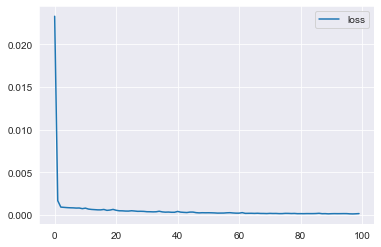

In [38]:
losses.plot()

## Creating Test set:

In [39]:
test_dataset=data_df[train_index-100:,:]

In [40]:
len(test_dataset)

524

In [41]:
scaled_test_set=scaler.fit_transform(test_dataset)

In [42]:
scaled_test_set

array([[0.18582781],
       [0.1875574 ],
       [0.2250689 ],
       [0.23225771],
       [0.23706826],
       [0.24414894],
       [0.25863461],
       [0.25079721],
       [0.24841895],
       [0.23917625],
       [0.24858109],
       [0.24214908],
       [0.23847356],
       [0.24560835],
       [0.24306794],
       [0.24955406],
       [0.24841895],
       [0.25074319],
       [0.24706767],
       [0.24490565],
       [0.24150041],
       [0.25971569],
       [0.2683098 ],
       [0.27630935],
       [0.27993076],
       [0.27712016],
       [0.26760711],
       [0.2650667 ],
       [0.27074209],
       [0.262202  ],
       [0.26274254],
       [0.25214849],
       [0.25160802],
       [0.23512241],
       [0.23950054],
       [0.23387926],
       [0.23096045],
       [0.21609639],
       [0.22831192],
       [0.2268526 ],
       [0.23409543],
       [0.23198744],
       [0.24317598],
       [0.22555534],
       [0.23355488],
       [0.24744606],
       [0.26155341],
       [0.260

In [43]:
len(scaled_test_set)

524

In [44]:
x_test=[]
y_test=test_data

for i in range(100,len(scaled_test_set)):
    x_test.append(scaled_test_set[i-100:i,0])
    

In [45]:
x_test=np.array(x_test)

In [46]:
x_test

array([[0.18582781, 0.1875574 , 0.2250689 , ..., 0.41176147, 0.42073397,
        0.40792388],
       [0.1875574 , 0.2250689 , 0.23225771, ..., 0.42073397, 0.40792388,
        0.42484183],
       [0.2250689 , 0.23225771, 0.23706826, ..., 0.40792388, 0.42484183,
        0.43240904],
       ...,
       [0.83908968, 0.85189977, 0.84427871, ..., 0.95508352, 0.94340846,
        0.95086738],
       [0.85189977, 0.84427871, 0.87022319, ..., 0.94340846, 0.95086738,
        0.95162417],
       [0.84427871, 0.87022319, 0.90503213, ..., 0.95086738, 0.95162417,
        0.9499486 ]])

In [47]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [48]:
x_test.shape

(424, 100, 1)

In [49]:
len(x_test
   )

424

## Predictions :

In [50]:
pred=model.predict(x_test)

In [51]:
pred=scaler.inverse_transform(pred)

In [52]:
pred

array([[218.41588],
       [219.66924],
       [221.5519 ],
       [221.69518],
       [223.56543],
       [225.45305],
       [227.08278],
       [228.81927],
       [231.16719],
       [230.01471],
       [226.27272],
       [223.58353],
       [224.46303],
       [220.37119],
       [216.08684],
       [218.11432],
       [218.85732],
       [221.30956],
       [222.68022],
       [220.16673],
       [219.33032],
       [220.13434],
       [222.07196],
       [219.29996],
       [218.82486],
       [217.6079 ],
       [214.65977],
       [213.20726],
       [215.82973],
       [220.41202],
       [215.80246],
       [207.71095],
       [203.55406],
       [205.40627],
       [207.99654],
       [207.80646],
       [202.16422],
       [196.4435 ],
       [191.08118],
       [189.65317],
       [191.14812],
       [190.37105],
       [185.7449 ],
       [181.31288],
       [177.19992],
       [175.1861 ],
       [174.612  ],
       [176.7866 ],
       [179.24358],
       [180.58392],


In [53]:
rmse=np.sqrt(np.mean(((pred-y_test)**2)))
rmse

5.922641670115308

## Visualising Plots :

In [54]:
data=df.filter(['Close'])

In [55]:
data

Close
Date                  
2012-01-03   58.747143
2012-01-04   59.062859
2012-01-05   59.718571
2012-01-06   60.342857
2012-01-09   60.247143
...                ...
2020-05-26  316.730011
2020-05-27  318.109985
2020-05-28  318.250000
2020-05-29  317.940002
2020-06-01  321.850006

[2116 rows x 1 columns]

In [56]:
train_d=data[:train_index]
test_d=data[train_index:]
pred_d=pred

In [57]:
train_d

Close
Date                  
2012-01-03   58.747143
2012-01-04   59.062859
2012-01-05   59.718571
2012-01-06   60.342857
2012-01-09   60.247143
...                ...
2018-09-17  217.880005
2018-09-18  218.240005
2018-09-19  218.369995
2018-09-20  220.029999
2018-09-21  217.660004

[1692 rows x 1 columns]

In [58]:

test_d

Close
Date                  
2018-09-24  220.789993
2018-09-25  222.190002
2018-09-26  220.419998
2018-09-27  224.949997
2018-09-28  225.740005
...                ...
2020-05-26  316.730011
2020-05-27  318.109985
2020-05-28  318.250000
2020-05-29  317.940002
2020-06-01  321.850006

[424 rows x 1 columns]

In [59]:
pred

array([[218.41588],
       [219.66924],
       [221.5519 ],
       [221.69518],
       [223.56543],
       [225.45305],
       [227.08278],
       [228.81927],
       [231.16719],
       [230.01471],
       [226.27272],
       [223.58353],
       [224.46303],
       [220.37119],
       [216.08684],
       [218.11432],
       [218.85732],
       [221.30956],
       [222.68022],
       [220.16673],
       [219.33032],
       [220.13434],
       [222.07196],
       [219.29996],
       [218.82486],
       [217.6079 ],
       [214.65977],
       [213.20726],
       [215.82973],
       [220.41202],
       [215.80246],
       [207.71095],
       [203.55406],
       [205.40627],
       [207.99654],
       [207.80646],
       [202.16422],
       [196.4435 ],
       [191.08118],
       [189.65317],
       [191.14812],
       [190.37105],
       [185.7449 ],
       [181.31288],
       [177.19992],
       [175.1861 ],
       [174.612  ],
       [176.7866 ],
       [179.24358],
       [180.58392],


In [60]:
test_d['Predictions']=pred

<ipython-input-60-d332745623ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_d['Predictions']=pred


In [61]:
test_d

Close  Predictions
Date                               
2018-09-24  220.789993   218.415878
2018-09-25  222.190002   219.669235
2018-09-26  220.419998   221.551895
2018-09-27  224.949997   221.695175
2018-09-28  225.740005   223.565430
...                ...          ...
2020-05-26  316.730011   317.326202
2020-05-27  318.109985   315.707306
2020-05-28  318.250000   316.304077
2020-05-29  317.940002   316.888885
2020-06-01  321.850006   316.830841

[424 rows x 2 columns]

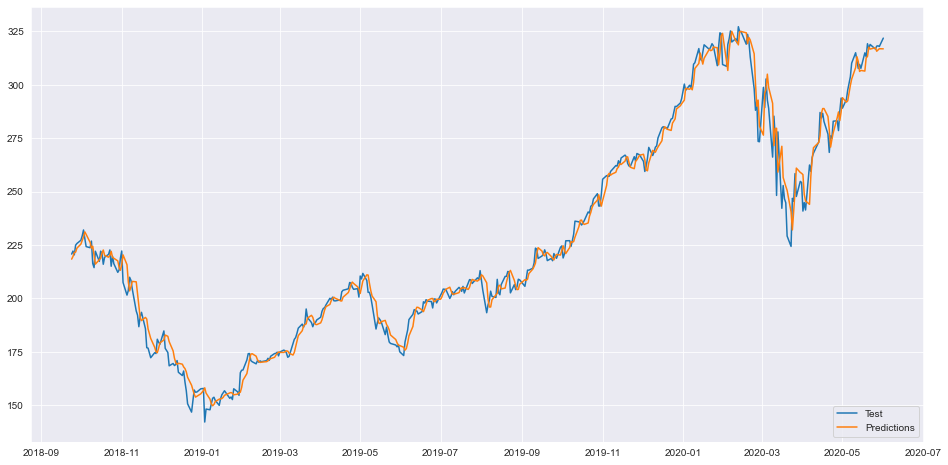

In [62]:
plt.figure(figsize=(16,8))
plt.plot(test_d[['Close','Predictions']])
plt.legend(['Test', 'Predictions'], loc='lower right')

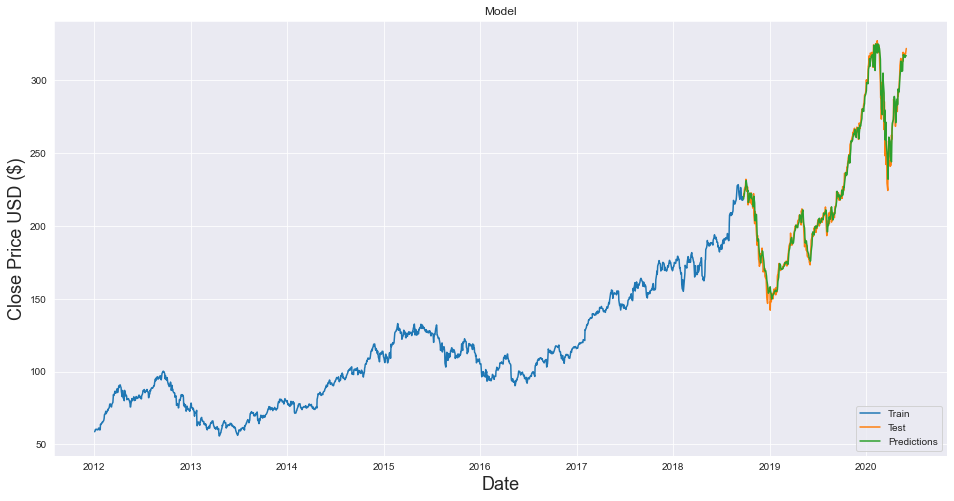

In [63]:
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

plt.plot(train_d['Close'])
plt.plot(test_d[['Close','Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')


## Forecasting Into Unknown Future [ For Next 30 Days ] :

In [64]:
test_d

Close  Predictions
Date                               
2018-09-24  220.789993   218.415878
2018-09-25  222.190002   219.669235
2018-09-26  220.419998   221.551895
2018-09-27  224.949997   221.695175
2018-09-28  225.740005   223.565430
...                ...          ...
2020-05-26  316.730011   317.326202
2020-05-27  318.109985   315.707306
2020-05-28  318.250000   316.304077
2020-05-29  317.940002   316.888885
2020-06-01  321.850006   316.830841

[424 rows x 2 columns]

In [65]:
len(test_d)

424

In [66]:
#In order to forecast for next 30 days , i have to take last or past 60 days to make that prediction
424-100

324

In [67]:
test_d.iloc[324:,1:2]

Predictions
Date                   
2020-01-08   297.659058
2020-01-09   301.080658
2020-01-10   307.653992
2020-01-13   309.974854
2020-01-14   314.876343
...                 ...
2020-05-26   317.326202
2020-05-27   315.707306
2020-05-28   316.304077
2020-05-29   316.888885
2020-06-01   316.830841

[100 rows x 1 columns]

In [68]:
xi=scaler.fit_transform(test_d.iloc[324:,1:2])

In [69]:
xi=xi.reshape(1,-1)

In [70]:
xi.shape

(1, 100)

In [71]:
xi

array([[0.7056515 , 0.742481  , 0.8132353 , 0.83821654, 0.89097524,
        0.8646455 , 0.8350954 , 0.8645525 , 0.91047   , 0.9029319 ,
        0.9053278 , 0.92104006, 0.9175093 , 0.8312123 , 0.8879628 ,
        0.9765613 , 0.9900253 , 0.85004807, 0.80316377, 0.900826  ,
        0.96196985, 1.        , 0.95291305, 0.94604635, 0.93204236,
        0.9987531 , 0.9994335 , 0.99299216, 0.93827915, 0.96905375,
        0.956727  , 0.887028  , 0.73893714, 0.62318635, 0.65394497,
        0.522732  , 0.47720957, 0.6892228 , 0.7081597 , 0.7844598 ,
        0.7175319 , 0.63752985, 0.42451787, 0.51094294, 0.511919  ,
        0.29080176, 0.4212489 , 0.26411414, 0.24167705, 0.21955371,
        0.19948769, 0.091048  , 0.        , 0.09923077, 0.19100142,
        0.31129026, 0.2894435 , 0.28492045, 0.27844548, 0.17874503,
        0.14606905, 0.12873197, 0.26961803, 0.35294652, 0.41391587,
        0.44055843, 0.47429585, 0.58584404, 0.61118937, 0.61125684,
        0.571414  , 0.50500035, 0.4170785 , 0.45

In [72]:
temp_input=list(xi)
temp_input=temp_input[0].tolist()       #To convert our array to list

In [73]:
len(temp_input)

100

In [74]:
#Prediction Loop for NEXT 30 Days :

In [75]:
#This Loop Will Run For 30 Times [ Because we want our data for next 30 days ]

list_output=[]                                          #List To Store Our values
n_steps=100                                               #Number of Days To Look Back
i=0

while(i<30):
    
    
    if(len(temp_input)>100):
        xi=np.array(temp_input[1:])
        xi=xi.reshape(1,-1)
        xi=xi.reshape((1,n_steps,1))
        yhat=model.predict(xi,verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        list_output.extend(yhat.tolist())
        i=i+1
        
    else:
        xi=xi.reshape((1,n_steps,1))
        yhat=model.predict(xi,verbose=0)
        temp_input.extend(yhat[0].tolist())
        list_output.extend(yhat.tolist())
        i=i+1
        
print(list_output)

[[0.8957477807998657], [0.8833552002906799], [0.8697717785835266], [0.8571964502334595], [0.8461838364601135], [0.8368945717811584], [0.8291906118392944], [0.822769284248352], [0.8172845244407654], [0.8124354481697083], [0.8080164194107056], [0.8039352893829346], [0.8002036213874817], [0.7969110012054443], [0.7941912412643433], [0.792186439037323], [0.7910199761390686], [0.7907770872116089], [0.7914952039718628], [0.7931622266769409], [0.7957237958908081], [0.7990935444831848], [0.8031648993492126], [0.8078237771987915], [0.8129569888114929], [0.818461000919342], [0.82424396276474], [0.8302285075187683], [0.8363499641418457], [0.8425534963607788]]


In [76]:
len(list_output)

30

In [77]:
#for Visualising Plot 

day_past=np.arange(1,101)                #100 Indexes for previous or past 100 days
day_pred=np.arange(101,131)              #30indexes for next 30 predicted days 

In [78]:
len(df)

2116

In [79]:
2116-100

2016

In [80]:
dfc=df[2016:]

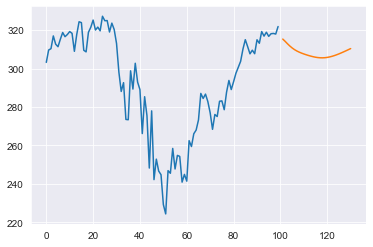

In [81]:
plt.plot(list(dfc['Close']))
plt.plot(day_pred,scaler.inverse_transform(list_output))

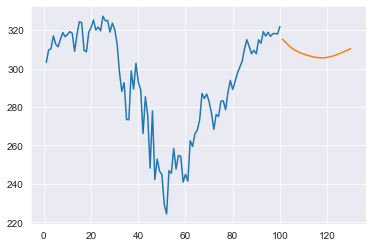

In [82]:
plt.plot(day_past,list(dfc['Close']))
plt.plot(day_pred,scaler.inverse_transform(list_output))

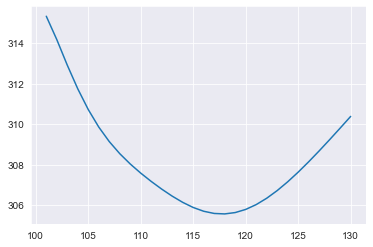

In [83]:
plt.plot(day_pred,scaler.inverse_transform(list_output))